In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib.animation import PillowWriter

In [2]:
fs = 44100
Nx = 101
Nt = 500000
L = 0.7
dx = L / (Nx - 1)
f = 220
c = 2 * L * f
dt = 1 /fs
l = 5e-5
gamma = 5e-5

In [3]:
ya = np.linspace(0, 0.01, 70)
yb = np.linspace(0.01, 0, 31)
y0 = np.concatenate([ya, yb])

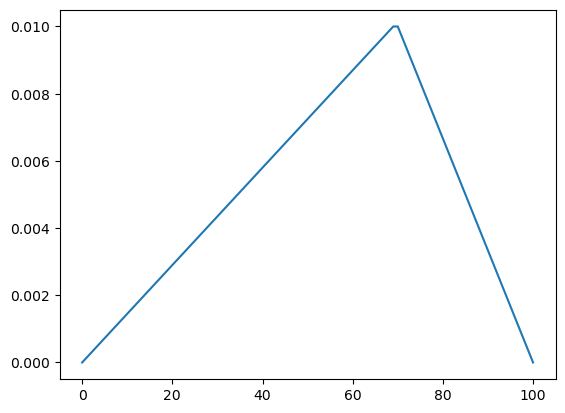

In [4]:
plt.plot(y0)

In [5]:
solution = np.zeros((Nt, Nx))

In [6]:
solution[0] = y0
solution[1] = y0

In [7]:
def compute(d, time, length, dt, dx, l, gamma):
    for t in range(1, time - 1):
        for i in range(2, length - 2):
            outer_fact = (1 / (c ** 2 * dt ** 2) + gamma / (2 * dt)) ** (-1)
            p1 = 1 / dx ** 2 * (d[t][i-1] - 2 * d[t][i] + d[t][i+1])
            p2 = 1 / (c ** 2 * dt ** 2) * (d[t-1][i] - 2 * d[t][i])
            p3 = gamma / (2 * dt) * d[t-1][i]
            p4 = l ** 2 / dx ** 4 * (d[t][i+2] - 4 * d[t][i+1] + 6 * d[t][i] - 4 * d[t][i-1] + d[t][i-2])
            d[t+1][i] = outer_fact * (p1 - p2 + p3 - p4)
    return d

In [8]:
solution = compute(solution, Nt, Nx, dt, dx, l, gamma)

In [ ]:
def animate(i):
    ax.clear()
    ax.plot(solution[i*10])
    ax.set_ylim(-0.01, 0.01)
    
fig, ax = plt.subplots(1, 1)
ax.set_ylim(-0.01, 0.01)
anim = animation.FuncAnimation(fig, animate, frames=50000, interval=50)
anim.save('string.gif', writer='pillow', fps=fs)